# Unsupervised Learning
## Mixture of Gaussians - Sklearn Implementation

Author: Bingchen Wang

Last Updated: 20 Sep, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Unsupervised Learning.ipynb">Unsupervised Learning</a> |
</nav>

---

In [101]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [11]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

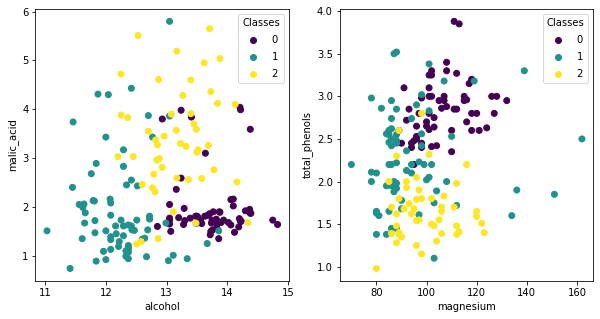

In [27]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
scatter1 = axes[0].scatter(X[:,0], X[:,1], c = y, label = target_names)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].legend(*scatter1.legend_elements(), title = "Classes")
scatter2 = axes[1].scatter(X[:,4], X[:,5], c = y, label = target_names)
axes[1].set_xlabel(feature_names[4])
axes[1].set_ylabel(feature_names[5])
axes[1].legend(*scatter2.legend_elements(), title = "Classes")
plt.show()

In [106]:
GMM = GaussianMixture(n_components = 3,init_params='k-means++')
GMM.fit(X)
y_pred = GMM.predict(X)
y_score = GMM.score_samples(X)
score_scaler = MinMaxScaler()
score_scaler.fit(y_score.reshape(-1,1))
y_scaled_score =  score_scaler.transform(y_score.reshape(-1,1)).reshape(-1)

In [48]:
GMM_means = GMM.means_

In [108]:
y_scaled_score

array([0.6897001 , 0.72952143, 0.65603819, 0.68604721, 0.90132214,
       0.97583613, 0.77872187, 0.82994557, 0.69592777, 0.78369882,
       0.78476457, 0.83269998, 1.        , 0.42812147, 0.74444199,
       0.64265295, 0.82670711, 0.83354075, 0.69038339, 0.7367648 ,
       0.79300085, 0.65283001, 0.79674543, 0.85838197, 0.82947615,
       0.57634761, 0.79611893, 0.74356826, 0.80772208, 0.77593235,
       0.8283372 , 0.9043488 , 0.87915053, 0.61816195, 0.95272393,
       0.94771999, 0.78118044, 0.89751108, 0.78452255, 0.513015  ,
       0.850623  , 0.61220962, 0.65181973, 0.72707895, 0.82358426,
       0.67979016, 0.7254074 , 0.92840102, 0.8957341 , 0.54240194,
       0.56215633, 0.82086214, 0.67977697, 0.88760289, 0.829479  ,
       0.74898159, 0.88105619, 0.96132613, 0.75901092, 0.05197302,
       0.3568053 , 0.51904433, 0.53446982, 0.68315546, 0.62102825,
       0.67390233, 0.39037654, 0.55386146, 0.29472464, 0.12260377,
       0.45250906, 0.50570697, 0.71647603, 0.        , 0.20801

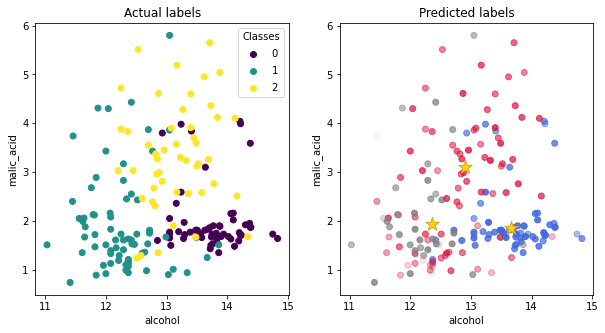

In [116]:
def alpha_scatter(ax, x, y, color_arr, alpha_arr, **kwarg):
    m = y.shape[0]
    color_rgba = [(*to_rgb(color_arr[i]),alpha_arr[i]) for i in range(m)]
    ax.scatter(x, y, c=color_rgba, **kwarg)

pred_colors = np.array(['grey', 'royalblue', 'crimson'])
fig, axes = plt.subplots(1,2, figsize = (10,5))
scatter1 = axes[0].scatter(X[:,0], X[:,1], c = y, label = target_names)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].legend(*scatter1.legend_elements(), title = "Classes")
axes[0].set_title('Actual labels')
#scatter2 = axes[1].scatter(X[:,0], X[:,1], c = pred_colors[y_pred])
alpha_scatter(axes[1], X[:,0], X[:,1], color_arr = pred_colors[y_pred], alpha_arr = y_scaled_score)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].scatter(GMM_means[:,0],GMM_means[:,1], c = "gold", marker = '*', s = 200, edgecolors = 'goldenrod')
axes[1].set_title('Predicted labels')
plt.show()